## 1: Desenvolva uma descrição completando a tabela abaixo sobre o ambiente de tarefas de cada um dos agentes a seguir. 

> (A) Agente comentarista de jogo
>
> (B) Agente sugestor de vinho
>
> (C) Agente treinador de time, ex. de basquete

| Agentes | Medida de desempenho | Ambiente | Atuadores | Sensores |
|---------|----------------------|----------|-----------|----------|
| A | Popularidade de seus comentários | Campeonatos, partidas ou noticiários sobre jogos | Comentar, analisar e comparar jogadas, partidas e jogadores | Dados, gravações, áudios do jogo |
| B | Classificação de desempenho pelos clientes | Lojas ou fábricas de vinho | Encaminhar clientes para diferentes tipos de vinho | Histórias, gostos, pedidos do cliente |
| C | Proporção de vitórias/derrotas do time | Clubes de esporte | Condicionar os jogadores, dar diferentes objetivos e rotinas para cumprirem | Estatísticas, resultados de treinos |

## 2: Diferencie os 4 tipos de aprendizado de máquina. Para tanto, escolha uma base de dados do Kaggle e explique como aplicar os 4 métodos nessa mesma base.

[The Complete Pokemon Dataset](https://www.kaggle.com/datasets/rounakbanik/pokemon)

> Aprendizagem supervisionada: Entrega-se um conjunto de dados com resultados conhecidos para que a IA possa reconhecer um padrão que relacione os dados com o resultado e prever um conjunto de dados desconhecido.
> > Entregamos uma parte da base de dados para a IA, treinamos ela e prevemos a parte restante (omitindo o resultado desejado).
>
> Aprendizagem não-supervisionada: Entrega-se um conjunto de dados e a IA tenta agrupá-los de alguma forma, de acordo com suas características em comum. Geralmente necessita de auxílio para interpretar os grupos gerados.
> > Entregamos a base de dados completa para a IA. Ela poderá agrupá-los de várias formas, pokémon lendários, que apresentam fraquezas a tipos X, com "attack" ou "base_total" acima de X, etc.
>
> Aprendizagem semi-supervisionada: Entrega-se um conjunto de dados com resultados conhecidos (poucos) e desconhecidos (muitos) para a IA. Ela agrupa os resultados e supomos que, em um mesmo grupo, os dados desconhecidos são da mesma categoria dos conhecidos.
> > Omitimos o resultado de grande parte do banco de dados e entregamos ele inteiro para a IA.
>
> Aprendizagem por reforço: Determina-se uma medida-alvo a ser atingida e o próprio agente realiza várias repetições a fim de deduzir uma estratégia para atingir cada vez mais/melhor essa medida.
> > Não se aplica à base escolhida.

## 3: Utilize o método k-NN na base escolhida na questão anterior para um contexto SUPERVISIONADO e para classificação.

### a) Aplique processos necessários para o pré-processamento e execução do método k-NN.

In [1]:
from pandas import read_csv

df = read_csv("databases/pokemon.csv")
df = df.set_index("pokedex_number")

Removendo colunas inúteis:

In [2]:
# Colunas informativas
df = df.drop(columns=df.columns[df.columns.str.contains("against_")])
# Colunas de categorização
df = df.drop(columns=["classification", "japanese_name", "name"])
# Colunas não mensuráveis
df = df.drop(columns=["abilities", "type1", "type2"])

Tratando atributos nulos:

In [3]:
print(df.isnull().sum())

df["height_m"].fillna(df["height_m"].median(), inplace = True)
df["percentage_male"].fillna(0, inplace=True)
df["weight_kg"].fillna(df["weight_kg"].median(), inplace = True)

attack                0
base_egg_steps        0
base_happiness        0
base_total            0
capture_rate          0
defense               0
experience_growth     0
height_m             20
hp                    0
percentage_male      98
sp_attack             0
sp_defense            0
speed                 0
weight_kg            20
generation            0
is_legendary          0
dtype: int64


Consertando dados (de tipos) errôneos:

In [4]:
print(df.dtypes)

df["capture_rate"] = df["capture_rate"].str.replace(r"\D.*", "", regex=True).astype("int64")

attack                 int64
base_egg_steps         int64
base_happiness         int64
base_total             int64
capture_rate          object
defense                int64
experience_growth      int64
height_m             float64
hp                     int64
percentage_male      float64
sp_attack              int64
sp_defense             int64
speed                  int64
weight_kg            float64
generation             int64
is_legendary           int64
dtype: object


### b) Aplique correlação ou PCA, selecione um número menor de atributos com esses métodos e justifique sua decisão.

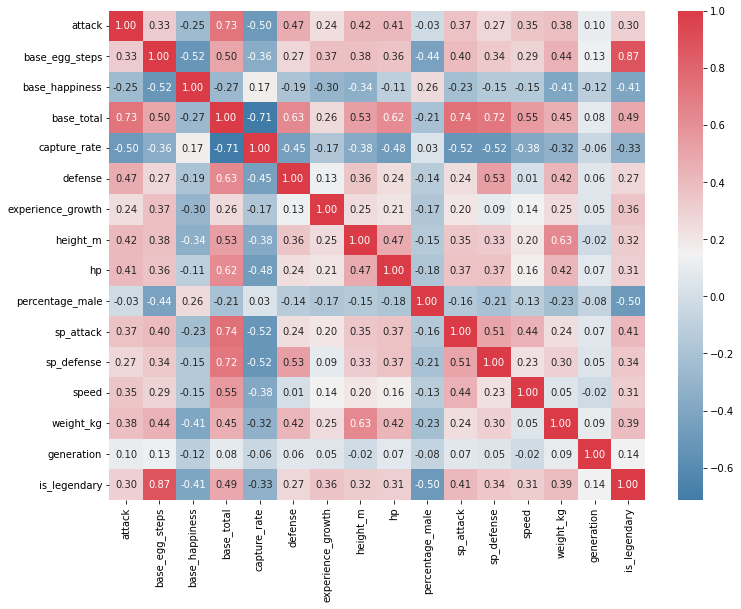

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from utils.cmap import lukewarm_cmap

# df.corr().style.background_gradient(cmap="coolwarm").format(precision=4)
plt.figure(figsize=(12, 9))
sns.heatmap(df.corr(), cmap=lukewarm_cmap, annot=True, fmt=".2f")
plt.show()

Podemos retirar as variáveis independentes que têm alta correlação (>= 0,7) entre si e as que tem baixíssima correlação, respectivamente:

- "attack", "capture_rate", "sp_attack" e "sp_defense" em favor de "base_total"
- "generation"

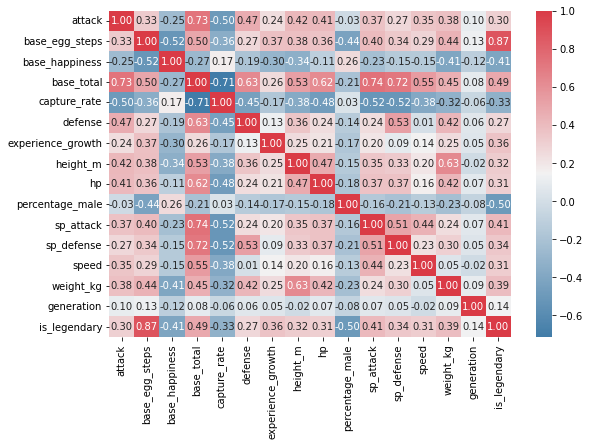

In [6]:
df_best = df.drop(columns=["attack", "capture_rate", "generation", "sp_attack", "sp_defense"])

plt.figure(figsize=(9, 6))
sns.heatmap(df.corr(), cmap=lukewarm_cmap, annot=True, fmt=".2f")
plt.show()

### c) Escolha 5 valores de K e mostre os resultados (escolha 3 métricas de avaliação e mostre a matriz de confusão). Explique os resultados encontrados.

In [7]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
# from imblearn.over_sampling import SMOTE

classes = ["Normal", "Legendary"]

x = df.iloc[:, :-1]
y = df.iloc[:, -1]
# x, y = SMOTE().fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=125419142, stratify=y, test_size=0.33)

Atenta-se que a acurácia pode estar enviésada pelo banco de dados ser desigual. (reflexo da natureza dos Pokémon lendários que estamos tentando analisar) Porém, numa análise manual das matrizes de confusão, ela não pareceu estar incorreta.

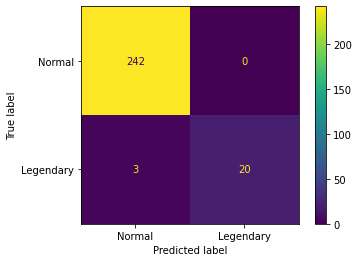

              precision    recall  f1-score   support

      Normal       0.99      1.00      0.99       242
   Legendary       1.00      0.87      0.93        23

    accuracy                           0.99       265
   macro avg       0.99      0.93      0.96       265
weighted avg       0.99      0.99      0.99       265



In [8]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)

results = knn.predict(x_test)
cm = confusion_matrix(y_test, results)

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes).plot()
plt.show()
print(classification_report(y_test, results, target_names=classes))

Foi observada uma precisão de 100%, ou seja, todos os Pokémon classificados como lendários estavam certos. A sensibilidade chegou perto de 90%, então o modelo não conseguiu prever alguns lendários. A acurácia de 98.8% significa que ele classificou corretamente quase todos os Pokémon, porém a sensibilidade é mais importante neste contexto.

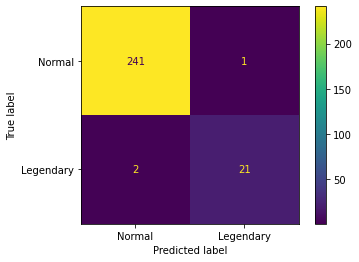

              precision    recall  f1-score   support

      Normal       0.99      1.00      0.99       242
   Legendary       0.95      0.91      0.93        23

    accuracy                           0.99       265
   macro avg       0.97      0.95      0.96       265
weighted avg       0.99      0.99      0.99       265



In [9]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

results = knn.predict(x_test)
cm = confusion_matrix(y_test, results)

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes).plot()
plt.show()
print(classification_report(y_test, results, target_names=classes))

Ao aumentar o k para 3, a precisão diminuiu mas a sensibilidade aumentou. Por um lado ele conseguiu reconhecer mais lendários, mas também confundiu mais normais com lendários. A acurácia continuou a mesma. Este é o melhor modelo por enquanto.

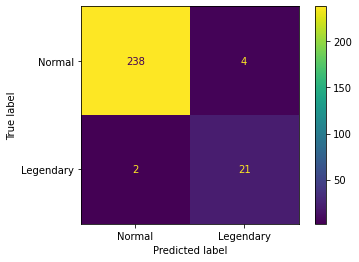

              precision    recall  f1-score   support

      Normal       0.99      0.98      0.99       242
   Legendary       0.84      0.91      0.87        23

    accuracy                           0.98       265
   macro avg       0.92      0.95      0.93       265
weighted avg       0.98      0.98      0.98       265



In [10]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

results = knn.predict(x_test)
cm = confusion_matrix(y_test, results)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes).plot()
plt.show()
print(classification_report(y_test, results, target_names=classes))

Com k = 5, todas as métricas menos sensibilidade diminuíram. Ele continuou prevendo a mesma quantidade de lendários, mas confundiu mais Pokémon normais e errou mais previsões. Este é o pior até agora.

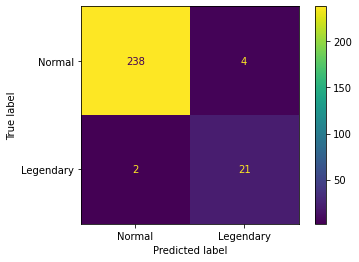

              precision    recall  f1-score   support

      Normal       0.99      0.98      0.99       242
   Legendary       0.84      0.91      0.87        23

    accuracy                           0.98       265
   macro avg       0.92      0.95      0.93       265
weighted avg       0.98      0.98      0.98       265



In [11]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)

results = knn.predict(x_test)
cm = confusion_matrix(y_test, results)

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes).plot()
plt.show()
print(classification_report(y_test, results, target_names=classes))

O resultado de k = 7 foi igual ao último modelo.

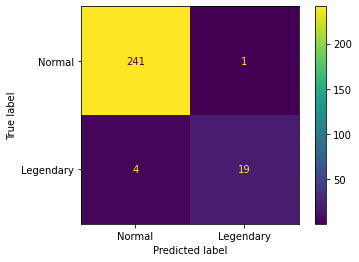

              precision    recall  f1-score   support

      Normal       0.98      1.00      0.99       242
   Legendary       0.95      0.83      0.88        23

    accuracy                           0.98       265
   macro avg       0.97      0.91      0.94       265
weighted avg       0.98      0.98      0.98       265



In [12]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)

results = knn.predict(x_test)
cm = confusion_matrix(y_test, results)

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes).plot()
plt.show()
print(classification_report(y_test, results, target_names=classes))

Já em k = 9, todos aumentaram menos a sensibilidade, que diminuiu. Ele confundiu menos Pokémon normais, mas errou bem mais lendários e a acurácia se distanciou ainda mais de um valor importante para nosso objetivo. Este foi o pior modelo, e o melhor foi k = 3.

### d) Escolha 2 métricas de similaridade (diferentes distâncias ou outras métricas - correlação, por exemplo) para definir o(s) vizinho(s) mais próximos e explique os resultados encontrados.

### e) Aplique k-NN no conjunto de atributos do item 2 usando o melhor k e a melhor métrica de distância.

## 4: Considerando a matriz de confusão abaixo, quais são os valores das métricas listadas abaixo?

Colunas: verdadeiras

Linhas: preditas

| Classes | Maçã | Laranja | Limão | Manga |
|---------|------|---------|-------|-------|
| Maçã    | 70   | 20      | 5     | 5     |
| Laranja | 10   | 67      | 3     | 20    |
| Limão   | 5    | 30      | 55    | 10    |
| Manga   | 5    | 4       | 2     | 1000  |

In [13]:
from math import prod, sqrt
from numpy import mean

apple = {"tp": 70, "tn": 1122, "fp": 30, "fn": 20}
orange = {"tp": 67, "tn": 1125, "fp": 33, "fn": 54}
lemon = {"tp": 55, "tn": 1137, "fp": 45, "fn": 10}
papaya = {"tp": 1000, "tn": 192, "fp": 11, "fn": 35}

In [14]:
def sensitivity(classe: dict[str, int]):
    return classe["tp"] / (classe["tp"] + classe["fn"])

print(f"Sensibilidade: {mean([sensitivity(apple), sensitivity(orange), sensitivity(lemon), sensitivity(papaya)]):.3f}")

Sensibilidade: 0.786


In [15]:
def specificity(classe: dict[str, int]):
    return classe["tn"] / (classe["tn"] + classe["fp"])

print(f"Especificidade: {mean([specificity(apple), specificity(orange), specificity(lemon), specificity(papaya)]):.3f}")

Especificidade: 0.963


In [16]:
def precision(classe: dict[str, int]):
    return classe["tp"] / (classe["tp"] + classe["fp"])

print(f"Precisão: {mean([precision(apple), precision(orange), precision(lemon), precision(papaya)]):.3f}")

Precisão: 0.727


In [17]:
def f1(classe: dict[str, int]):
    precisionRecall = [precision(classe), sensitivity(classe)]
    return 2 * (prod(precisionRecall) / sum(precisionRecall))


print(f"Medida F1: {mean([f1(apple), f1(orange), f1(lemon), f1(papaya)]):.3f}")

Medida F1: 0.747


In [18]:
def accuracy(classe: dict[str, int]):
    return (classe["tp"] + classe["tn"]) / sum(classe.values())

print(f"Acurácia: {mean([accuracy(apple), accuracy(orange), accuracy(lemon), accuracy(papaya)]):.3f}")

Acurácia: 0.953


In [19]:
def matthews_coef(classe: dict[str, int]):
    return (classe["tp"] * classe["tn"] - classe["fp"] * classe["fn"]) / sqrt((classe["tp"] + classe["fp"]) * (classe["tp"] + classe["fn"]) * (classe["tn"] + classe["fp"]) * (classe["tn"] + classe["fn"]))

print(f"Coeficiente de Matthews: {mean([matthews_coef(apple), matthews_coef(orange), matthews_coef(lemon), matthews_coef(papaya)]):.3f}")

Coeficiente de Matthews: 0.706


In [20]:
def fallOut(classe: dict[str, int]):
    return classe["fp"] / (classe["fp"] + classe["tn"])


def auc(classe: dict[str, int]):
    """
    Area of a triangle + area of a trapezium

    Credits:https://stackoverflow.com/a/50892759/8209582
    """
    # return (sensitivity(classe) - specificity(classe)) / 2
    return 1 / 2 - fallOut(classe) / 2 + sensitivity(classe) / 2


print(f"AUC: {mean([auc(apple), auc(orange), auc(lemon), auc(papaya)]):.3f}")

AUC: 0.875


### Como você resolveria o problema dessa base de dados observando as métricas de avaliação?

## 5: Elabore uma pergunta e responda sobre "Preconceito e Inteligência Artificial", refletindo aspectos importantes do método que uma pessoa engenheiro de dados/cientista de dados deve conhecer e se preocupar garantindo ética nos modelos criados.